In [284]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [285]:
tickers = ["AAPL","GE","F","M","^VIX"]

In [286]:
df = pd.DataFrame()
for x in tickers:
    df[x] = yf.download(x, start = "2018-1-1", end="2022-1-1", progress=False)["Adj Close"]

In [287]:
df

,AAPL,GE,F,M,^VIX
Date,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000
...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001


### Daily Returns

In [288]:
for x in tickers:
    df[f"{x} daily returns"] = df[x].pct_change()

In [289]:
df.columns

Index(['AAPL', 'GE', 'F', 'M', '^VIX', 'AAPL daily returns',
       'GE daily returns', 'F daily returns', 'M daily returns',
       '^VIX daily returns'],
      dtype='object')

In [329]:
returns = df[['AAPL daily returns',
       'GE daily returns', 'F daily returns', 'M daily returns',
       '^VIX daily returns']]

## Cumulative Daily Returns 

In [291]:
for x in tickers:
    df[f"{x} cumulative return"] = (1 + df[f"{x} daily returns"]).cumprod()

In [292]:
df

,AAPL,GE,F,M,^VIX,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns,AAPL cumulative return,GE cumulative return,F cumulative return,M cumulative return,^VIX cumulative return
Date,,,,,,,,,,,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000,-0.000174,0.009455,0.007899,-0.037248,-0.063460,0.999826,1.009455,1.007899,0.962752,0.936540
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000,0.004645,0.020937,0.017241,-0.033162,0.007650,1.004470,1.030589,1.025277,0.930825,0.943705
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000,0.011386,0.000540,0.016949,-0.000408,0.000000,1.015906,1.031146,1.042654,0.930444,0.943705
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000,-0.003715,-0.014024,-0.003788,-0.001634,0.032538,1.012133,1.016685,1.038705,0.928924,0.974411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000,0.022975,0.006596,0.027160,0.026651,-0.015590,4.378200,0.712160,1.919553,1.172286,1.809621
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001,-0.005767,0.007187,-0.001923,0.009299,-0.007919,4.352950,0.717278,1.915862,1.183187,1.795292
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001,0.000502,-0.005352,-0.009634,0.035701,-0.033637,4.355135,0.713439,1.897405,1.225428,1.734903


## Normalized Return

In [293]:
for x in tickers:
    df[f"{x} normmalized return"] = df[x]/df.iloc[0][x]

In [294]:
df

,AAPL,GE,F,M,^VIX,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns,AAPL cumulative return,GE cumulative return,F cumulative return,M cumulative return,^VIX cumulative return,AAPL normmalized return,GE normmalized return,F normmalized return,M normmalized return,^VIX normmalized return
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000,-0.000174,0.009455,0.007899,-0.037248,-0.063460,0.999826,1.009455,1.007899,0.962752,0.936540,0.999826,1.009455,1.007899,0.962752,0.936540
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000,0.004645,0.020937,0.017241,-0.033162,0.007650,1.004470,1.030589,1.025277,0.930825,0.943705,1.004470,1.030589,1.025277,0.930825,0.943705
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000,0.011386,0.000540,0.016949,-0.000408,0.000000,1.015906,1.031146,1.042654,0.930444,0.943705,1.015906,1.031146,1.042654,0.930444,0.943705
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000,-0.003715,-0.014024,-0.003788,-0.001634,0.032538,1.012133,1.016685,1.038705,0.928924,0.974411,1.012133,1.016685,1.038705,0.928924,0.974411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000,0.022975,0.006596,0.027160,0.026651,-0.015590,4.378200,0.712160,1.919553,1.172286,1.809621,4.378200,0.712160,1.919553,1.172286,1.809621
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001,-0.005767,0.007187,-0.001923,0.009299,-0.007919,4.352950,0.717278,1.915862,1.183187,1.795292,4.352950,0.717278,1.915862,1.183187,1.795292
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001,0.000502,-0.005352,-0.009634,0.035701,-0.033637,4.355135,0.713439,1.897405,1.225428,1.734903,4.355135,0.713439,1.897405,1.225428,1.734903


## Allocation

In [295]:
allocations = np.array(np.random.random(len(tickers)))

In [296]:
for ticker, allocation in zip(tickers, allocations):
    df[f"{ticker} allocation"] = df[f"{x} normmalized return"] * allocation

In [297]:
df

,AAPL,GE,F,M,^VIX,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns,...,AAPL normmalized return,GE normmalized return,F normmalized return,M normmalized return,^VIX normmalized return,AAPL allocation,GE allocation,F allocation,M allocation,^VIX allocation
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.259588,0.850053,0.177371,0.576472,0.784182
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000,-0.000174,0.009455,0.007899,-0.037248,-0.063460,...,0.999826,1.009455,1.007899,0.962752,0.936540,0.243114,0.796109,0.166116,0.539890,0.734418
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000,0.004645,0.020937,0.017241,-0.033162,0.007650,...,1.004470,1.030589,1.025277,0.930825,0.943705,0.244974,0.802200,0.167386,0.544020,0.740036
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000,0.011386,0.000540,0.016949,-0.000408,0.000000,...,1.015906,1.031146,1.042654,0.930444,0.943705,0.244974,0.802200,0.167386,0.544020,0.740036
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000,-0.003715,-0.014024,-0.003788,-0.001634,0.032538,...,1.012133,1.016685,1.038705,0.928924,0.974411,0.252945,0.828302,0.172833,0.561721,0.764116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000,0.022975,0.006596,0.027160,0.026651,-0.015590,...,4.378200,0.712160,1.919553,1.172286,1.809621,0.469756,1.538275,0.320975,1.043197,1.419072
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001,-0.005767,0.007187,-0.001923,0.009299,-0.007919,...,4.352950,0.717278,1.915862,1.183187,1.795292,0.466036,1.526094,0.318434,1.034936,1.407835
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001,0.000502,-0.005352,-0.009634,0.035701,-0.033637,...,4.355135,0.713439,1.897405,1.225428,1.734903,0.450360,1.474760,0.307722,1.000124,1.360479


## PositionValue
- 100000

In [298]:
for x in tickers:
    df[f"{x} position value"] = df[f"{x} allocation"] * 100000

In [299]:
df

,AAPL,GE,F,M,^VIX,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns,...,AAPL allocation,GE allocation,F allocation,M allocation,^VIX allocation,AAPL position value,GE position value,F position value,M position value,^VIX position value
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000,NaN,NaN,NaN,NaN,NaN,...,0.259588,0.850053,0.177371,0.576472,0.784182,25958.781194,85005.333707,17737.147109,57647.249149,78418.159007
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000,-0.000174,0.009455,0.007899,-0.037248,-0.063460,...,0.243114,0.796109,0.166116,0.539890,0.734418,24311.445946,79610.924723,16611.553908,53988.974719,73441.769844
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000,0.004645,0.020937,0.017241,-0.033162,0.007650,...,0.244974,0.802200,0.167386,0.544020,0.740036,24497.436881,80219.975717,16738.638016,54402.008970,74003.624678
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000,0.011386,0.000540,0.016949,-0.000408,0.000000,...,0.244974,0.802200,0.167386,0.544020,0.740036,24497.436881,80219.975717,16738.638016,54402.008970,74003.624678
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000,-0.003715,-0.014024,-0.003788,-0.001634,0.032538,...,0.252945,0.828302,0.172833,0.561721,0.764116,25294.534010,82830.171739,17283.279497,56172.140488,76411.553190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000,0.022975,0.006596,0.027160,0.026651,-0.015590,...,0.469756,1.538275,0.320975,1.043197,1.419072,46975.561713,153827.457059,32097.518077,104319.686263,141907.165836
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001,-0.005767,0.007187,-0.001923,0.009299,-0.007919,...,0.466036,1.526094,0.318434,1.034936,1.407835,46603.584911,152609.371667,31843.353322,103493.629014,140783.471477
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001,0.000502,-0.005352,-0.009634,0.035701,-0.033637,...,0.450360,1.474760,0.307722,1.000124,1.360479,45035.961150,147475.988094,30772.225480,100012.371676,136047.880524


## Total Positon

In [300]:
df.columns

Index(['AAPL', 'GE', 'F', 'M', '^VIX', 'AAPL daily returns',
       'GE daily returns', 'F daily returns', 'M daily returns',
       '^VIX daily returns', 'AAPL cumulative return', 'GE cumulative return',
       'F cumulative return', 'M cumulative return', '^VIX cumulative return',
       'AAPL normmalized return', 'GE normmalized return',
       'F normmalized return', 'M normmalized return',
       '^VIX normmalized return', 'AAPL allocation', 'GE allocation',
       'F allocation', 'M allocation', '^VIX allocation',
       'AAPL position value', 'GE position value', 'F position value',
       'M position value', '^VIX position value'],
      dtype='object')

In [301]:
df["totalPosition"] = df[['AAPL position value', 'GE position value', 'F position value',
       'M position value', '^VIX position value']].sum(axis=1)

In [302]:
df

,AAPL,GE,F,M,^VIX,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns,...,GE allocation,F allocation,M allocation,^VIX allocation,AAPL position value,GE position value,F position value,M position value,^VIX position value,totalPosition
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000,NaN,NaN,NaN,NaN,NaN,...,0.850053,0.177371,0.576472,0.784182,25958.781194,85005.333707,17737.147109,57647.249149,78418.159007,264766.670166
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000,-0.000174,0.009455,0.007899,-0.037248,-0.063460,...,0.796109,0.166116,0.539890,0.734418,24311.445946,79610.924723,16611.553908,53988.974719,73441.769844,247964.669141
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000,0.004645,0.020937,0.017241,-0.033162,0.007650,...,0.802200,0.167386,0.544020,0.740036,24497.436881,80219.975717,16738.638016,54402.008970,74003.624678,249861.684263
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000,0.011386,0.000540,0.016949,-0.000408,0.000000,...,0.802200,0.167386,0.544020,0.740036,24497.436881,80219.975717,16738.638016,54402.008970,74003.624678,249861.684263
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000,-0.003715,-0.014024,-0.003788,-0.001634,0.032538,...,0.828302,0.172833,0.561721,0.764116,25294.534010,82830.171739,17283.279497,56172.140488,76411.553190,257991.678923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000,0.022975,0.006596,0.027160,0.026651,-0.015590,...,1.538275,0.320975,1.043197,1.419072,46975.561713,153827.457059,32097.518077,104319.686263,141907.165836,479127.388947
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001,-0.005767,0.007187,-0.001923,0.009299,-0.007919,...,1.526094,0.318434,1.034936,1.407835,46603.584911,152609.371667,31843.353322,103493.629014,140783.471477,475333.410391
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001,0.000502,-0.005352,-0.009634,0.035701,-0.033637,...,1.474760,0.307722,1.000124,1.360479,45035.961150,147475.988094,30772.225480,100012.371676,136047.880524,459344.426924


<AxesSubplot:xlabel='Date'>

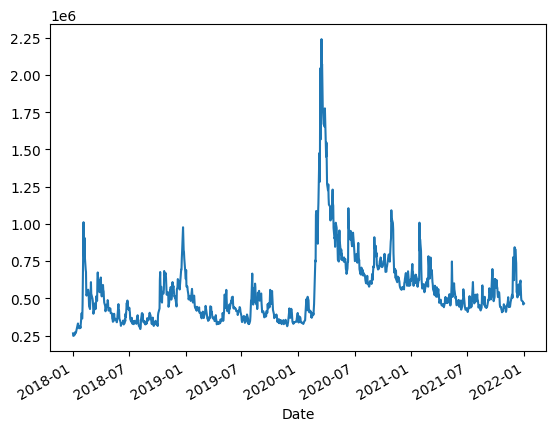

In [303]:
df["totalPosition"].plot()

In [304]:
df["portfolio Daily Return"] = df["totalPosition"].pct_change()

In [305]:
df

,AAPL,GE,F,M,^VIX,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns,...,F allocation,M allocation,^VIX allocation,AAPL position value,GE position value,F position value,M position value,^VIX position value,totalPosition,portfolio Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.888065,103.178185,9.871420,21.159603,9.770000,NaN,NaN,NaN,NaN,NaN,...,0.177371,0.576472,0.784182,25958.781194,85005.333707,17737.147109,57647.249149,78418.159007,264766.670166,NaN
2018-01-03,40.880939,104.153725,9.949395,20.371443,9.150000,-0.000174,0.009455,0.007899,-0.037248,-0.063460,...,0.166116,0.539890,0.734418,24311.445946,79610.924723,16611.553908,53988.974719,73441.769844,247964.669141,-0.063460
2018-01-04,41.070835,106.334343,10.120935,19.695881,9.220000,0.004645,0.020937,0.017241,-0.033162,0.007650,...,0.167386,0.544020,0.740036,24497.436881,80219.975717,16738.638016,54402.008970,74003.624678,249861.684263,0.007650
2018-01-05,41.538448,106.391739,10.292475,19.687836,9.220000,0.011386,0.000540,0.016949,-0.000408,0.000000,...,0.167386,0.544020,0.740036,24497.436881,80219.975717,16738.638016,54402.008970,74003.624678,249861.684263,0.000000
2018-01-08,41.384151,104.899742,10.253491,19.655668,9.520000,-0.003715,-0.014024,-0.003788,-0.001634,0.032538,...,0.172833,0.561721,0.764116,25294.534010,82830.171739,17283.279497,56172.140488,76411.553190,257991.678923,0.032538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.016113,73.479340,18.948717,24.805117,17.680000,0.022975,0.006596,0.027160,0.026651,-0.015590,...,0.320975,1.043197,1.419072,46975.561713,153827.457059,32097.518077,104319.686263,141907.165836,479127.388947,-0.015590
2021-12-28,177.983688,74.007408,18.912281,25.035772,17.540001,-0.005767,0.007187,-0.001923,0.009299,-0.007919,...,0.318434,1.034936,1.407835,46603.584911,152609.371667,31843.353322,103493.629014,140783.471477,475333.410391,-0.007919
2021-12-29,178.073044,73.611351,18.730082,25.929565,16.950001,0.000502,-0.005352,-0.009634,0.035701,-0.033637,...,0.307722,1.000124,1.360479,45035.961150,147475.988094,30772.225480,100012.371676,136047.880524,459344.426924,-0.033637


## Cumulative Daily Return

In [306]:
cum_return = 100 * (df["totalPosition"][-1] / df["totalPosition"][0] - 1)

In [307]:
cum_return

76.25382299415067

In [308]:
df["totalPosition"][-1] 

466661.378181889

## Sharp Ratio
- risk free rate == 0

In [309]:
SR = df["portfolio Daily Return"].mean() / df["portfolio Daily Return"].std()

In [310]:
SR 

0.04841452941062469

In [311]:
sharp = (252 ** 0.5) * SR

In [312]:
sharp

0.7685568279764128

In [313]:
np.sqrt(252) * SR

0.7685568279764128

### What is the sharp 
- How much greater a return is based on the additional risks that are applied)

## Monte Carlo Simulation
- Random guessing and checking
- we will ue minmalizaiton with scy py
- We want to maxamize the sharo ratio, lower the volatility
- the minamizer eill try to minamize the -sharp

## Graph is known as the bullet
## Border is called the Efficient Frontier

## Setting Weights

In [314]:
np.random.seed(101)
weights = np.array(np.random.random(len(tickers)))

In [315]:
weights

array([0.51639863, 0.57066759, 0.02847423, 0.17152166, 0.68527698])

In [316]:
weights = weights /np.sum(weights)

In [317]:
weights

array([0.26182041, 0.28933544, 0.01443678, 0.08696357, 0.3474438 ])

## Expected Return

In [321]:
expctedReturn = np.sum((returns.mean() * weights) * 252)

In [322]:
expctedReturn

0.5539483118935885

In [323]:
df.cov()["portfolio Daily Return"][-1]

0.009513926188209312

## Calculating Expected Varience(Volatility) 

In [324]:
df.columns

Index(['AAPL', 'GE', 'F', 'M', '^VIX', 'AAPL daily returns',
       'GE daily returns', 'F daily returns', 'M daily returns',
       '^VIX daily returns', 'AAPL cumulative return', 'GE cumulative return',
       'F cumulative return', 'M cumulative return', '^VIX cumulative return',
       'AAPL normmalized return', 'GE normmalized return',
       'F normmalized return', 'M normmalized return',
       '^VIX normmalized return', 'AAPL allocation', 'GE allocation',
       'F allocation', 'M allocation', '^VIX allocation',
       'AAPL position value', 'GE position value', 'F position value',
       'M position value', '^VIX position value', 'totalPosition',
       'portfolio Daily Return'],
      dtype='object')

In [330]:
returns.cov()

,AAPL daily returns,GE daily returns,F daily returns,M daily returns,^VIX daily returns
AAPL daily returns,0.000429,0.000195,0.000173,0.000204,-0.001100
GE daily returns,0.000195,0.000824,0.000377,0.000513,-0.001045
F daily returns,0.000173,0.000377,0.000639,0.000490,-0.000964
M daily returns,0.000204,0.000513,0.000490,0.001653,-0.000993
^VIX daily returns,-0.001100,-0.001045,-0.000964,-0.000993,0.009514


In [331]:
exp_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

In [332]:
exp_vol

0.4628142696020573

## Sharp

In [333]:
sharp = expctedReturn/exp_vol

In [334]:
sharp

1.1969127753340258

### For loop

In [335]:
np.random.seed(101)

numPortfolio = 5000
all_weights = np.zeros((numPortfolio, len(tickers)))
all_returns = np.zeros(numPortfolio)
all_vol = np.zeros(numPortfolio)
all_sharps = np.zeros(numPortfolio)

for index in range(numPortfolio):
    ## Weights 
    weights = np.array(np.random.random(len(tickers)))
    weights = weights/np.sum(weights)
    
    ##numpy broadcasting
    all_weights[index,:] = weights
    
    ## Expected REturn
    all_returns[index] = np.sum( (returns.mean() * weights) * 252)
    
    ## expected Vol
    all_vol[index] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    ## Sharp
    all_sharps[index] = all_returns[index]/all_vol[index]

In [336]:
all_sharps.max()

2.1335630638619185

In [337]:
all_sharps.argmax()

263

In [338]:
maxSHarp = all_sharps.argmax()

In [339]:
all_weights[maxSHarp,:]

array([0.60261915, 0.0657193 , 0.11819138, 0.03291392, 0.18055626])

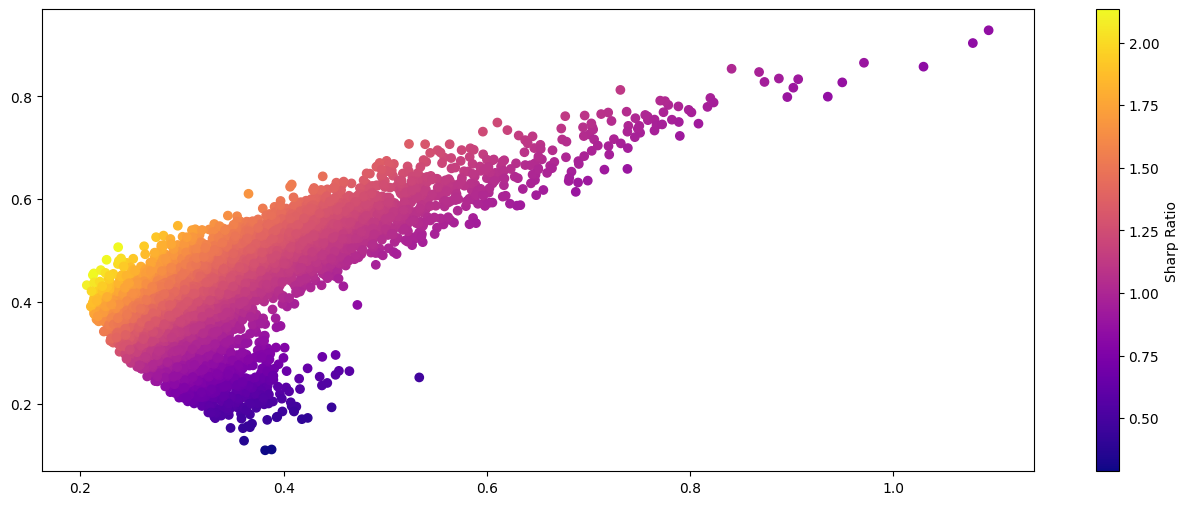

In [340]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_sharps, cmap="plasma")
plt.colorbar(label = "Sharp Ratio")